# QUESTION 1

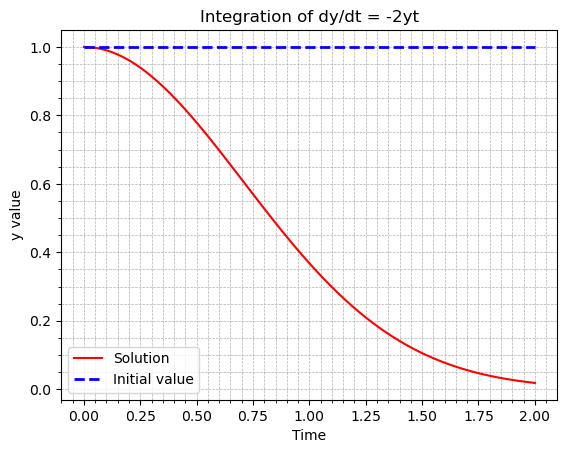

In [4]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt


y0 = 1  

start = 0
end = 2
t = np.linspace(start, end, 100)  
def dYdt(y, t):
    # The differential equation
    dydt = -2 * y * t
    return dydt  

y_initial = np.full_like(t, y0)  

y = sc.integrate.odeint(dYdt, y0, t)

# Plotting the function
plt.plot(t, y, 'r', label='Solution')
plt.plot(t, y_initial, 'b--', label='Initial value', linewidth=2)
plt.title('Integration of dy/dt = -2yt')
plt.xlabel('Time')
plt.ylabel('y value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()


# QUESTION 2

In [5]:
import numpy as np
import scipy as sc

A = np.array([[2, 4, 6], [5, 3, 2], [7, 8, 9]])
print(A)


b = np.array([[18], [13], [30]])
print(b)

C=np.linalg.solve(A,b)
print(C)

[[2 4 6]
 [5 3 2]
 [7 8 9]]
[[18]
 [13]
 [30]]
[[ 4.5]
 [-7.5]
 [ 6.5]]


# QUESTION 3

In [6]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_weather_data(latitude, longitude, forecast_days=1):
    api_url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m&timezone=Asia%2FSingapore&forecast_days={forecast_days}"
    response = requests.get(api_url)
    weather_data = response.json()
    return weather_data

def plot_temperature_trend(weather_data):
    hourly_data = weather_data.get('hourly', {}).get('temperature_2m', [])

    if not hourly_data:
        print("No temperature data available.")
        return

    timestamps = [datetime.fromtimestamp(entry['timestamp']) for entry in hourly_data]
    temperatures = [entry['value'] for entry in hourly_data]

    plt.plot(timestamps, temperatures, marker='o', linestyle='-', color='b')
    plt.title('Hourly Temperature Trend')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def main():
    latitude = 2.5  
    longitude = 112.5  
    forecast_days = int(input("Enter the number of days (1 to 16) for weather forecast: "))